# **Load Data**

In [1]:
#mount google drive home directory
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Common Model helpers
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pickle
from collections import Counter
from imblearn.over_sampling import SMOTE 

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#Configure Visualization Defaults
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window

#saving models
import pickle

In [3]:
data = pd.DataFrame()
data = pd.read_csv("/gdrive/My Drive/CIS_508/Colab Notebooks/Projects/train.csv", index_col = None)
data.shape

(76020, 371)

In [4]:
test_data = pd.DataFrame()
test_data = pd.read_csv("/gdrive/My Drive/CIS_508/Colab Notebooks/Projects/test.csv")
test_data.shape

(75818, 370)

In [5]:
combined_data = pd.concat([data.iloc[:, :-1], test_data], keys=[0,1]) #drop the y_train
combined_data.shape

(151838, 370)

# **Analysis of Data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [8]:
data.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [9]:
data.shape

(76020, 371)

In [10]:
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

# **Exploring Data**

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

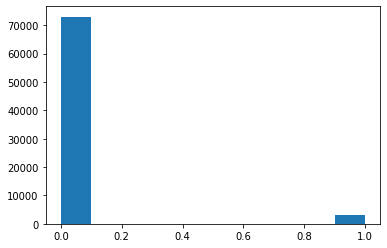

In [11]:
plt.hist(data['TARGET'])

((array([-4.28546381, -4.08401351, -3.97434503, ...,  3.97434503,
          4.08401351,  4.28546381]), array([0, 0, 0, ..., 1, 1, 1])),
 (0.08541934720619783, 0.039568534596158944, 0.43815076333573527))

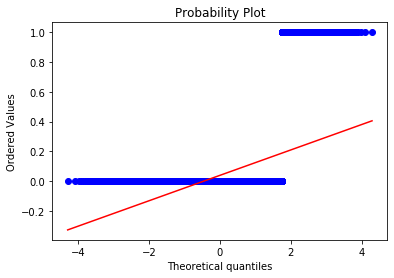

In [12]:
stats.probplot(data['TARGET'], plot = plt)

In [0]:
#scatterplot - total
#sns.set()
#sns.pairplot(data, size = 2.5)
#plt.show()

In [0]:
#correlation matrix - without numbers
corrmat = data.corr()
#f, ax = plt.subplots(figsize=(30, 30))
#sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
#correlation between independent variables and target
cor_target = abs(corrmat["TARGET"])
cor_target.shape

(371,)

# **Pre-processing**

In [0]:
def remove_constant_columns(data):  
  columns = list(data.columns)
  for col in columns:
    if data[col].std() <= 0.1:
      columns.remove(col)
  return data[columns]

In [16]:
combined_data = remove_constant_columns(combined_data)
combined_data.shape

(151838, 313)

In [0]:
if combined_data.isnull().values.any(): #if there are any missing values
  total = combined_data.isnull().sum()
  total.shape  

In [18]:
print('Data columns with null values: \n', combined_data.isnull().sum())
print("-"*10)
print (combined_data.info())
print("-"*10)

combined_data.describe(include = 'all')

Data columns with null values: 
 ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var2_0                       0
ind_var5_0                       0
ind_var5                         0
ind_var6                         0
ind_var8_0                       0
ind_var8                         0
ind_var12_0           

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var2_0,ind_var5_0,ind_var5,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio,ind_var13,ind_var14_0,ind_var17_0,ind_var18_0,ind_var19,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var28_0,ind_var27,ind_var29,ind_var30,ind_var31,ind_var32_0,ind_var33_0,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var41_0,ind_var39,ind_var44,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var28_0,num_var27,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var34_0,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var33_ul

In [19]:
combined_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var2_0,ind_var5_0,ind_var5,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio,ind_var13,ind_var14_0,ind_var17_0,ind_var18_0,ind_var19,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var28_0,ind_var27,ind_var29,ind_var30,ind_var31,ind_var32_0,ind_var33_0,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var41_0,ind_var39,ind_var44,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var28_0,num_var27,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var34_0,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var33_ul

# **Working with Imbalanced Data**

1. Up-sample the minority class
2. Down-sample the majority class
3. Change your performance metric
4. Penalize algorithms (cost-sensitive training)
5. Use tree-based algorithms

In [20]:
combined_data.shape

(151838, 313)

In [21]:
X = data[combined_data.columns]
X.shape
y = data["TARGET"].copy(deep = True)
y.shape
test_data = test_data[combined_data.columns]
test_data.shape

(75818, 313)

In [0]:
#pd.concat([data[combined_data.columns], data["TARGET"]], axis = 1) #axis = 1 concatenates along the columns
#X.shape

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state = 66)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60816, 313) (60816,)
(15204, 313) (15204,)


In [23]:
y_train.describe()

count    60816.000000
mean         0.039611
std          0.195046
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TARGET, dtype: float64

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

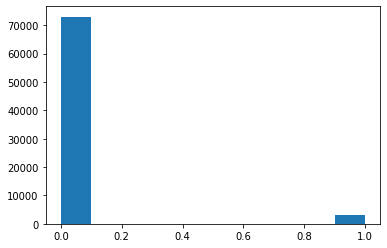

In [0]:
plt.hist(y) #unbalanced data


# **Tree Based Models**

**1. Decision Tree Classifier**

In [0]:
#setup the model
model1 = tree.DecisionTreeClassifier(random_state=66)
#train the model
model1.fit(X_train, y_train)
print(model1, "\n")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=66, splitter='best') 



In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model1.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58407
           1       1.00      1.00      1.00      2409

    accuracy                           1.00     60816
   macro avg       1.00      1.00      1.00     60816
weighted avg       1.00      1.00      1.00     60816
 

Confusion Matrix.. 
  [[58407     0]
 [    0  2409]]

 AUC score ..  1.0


In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model1.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14605
           1       0.13      0.15      0.14       599

    accuracy                           0.93     15204
   macro avg       0.55      0.55      0.55     15204
weighted avg       0.93      0.93      0.93     15204

Confusion matrix .. 
 [[13993   612]
 [  511    88]]

 AUC score ..  0.5525040307393527


**2. Random Forest Classifier**

In [0]:
#setup the model
model2 = ensemble.RandomForestClassifier(random_state=66, class_weight = {0:0.1, 1:0.9}, n_estimators = 150, min_samples_split = 10)
#train the model
model2.fit(X_train, y_train)
print(model2, "\n")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=66, verbose=0, warm_start=False) 



In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model2.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58407
           1       0.90      0.92      0.91      2409

    accuracy                           0.99     60816
   macro avg       0.95      0.96      0.95     60816
weighted avg       0.99      0.99      0.99     60816
 

Confusion Matrix.. 
  [[58170   237]
 [  197  2212]]

 AUC score ..  0.957082798188117


In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model2.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14605
           1       0.23      0.09      0.13       599

    accuracy                           0.95     15204
   macro avg       0.60      0.54      0.55     15204
weighted avg       0.93      0.95      0.94     15204

Confusion matrix .. 
 [[14425   180]
 [  545    54]]

 AUC score ..  0.5389128520145696


In [0]:
#hyperparameter tuning for randomforest classifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Number of trees in random forest
n_estimators = [100, 150, 200, 250, 300]
# Maximum number of levels in tree
max_depth = [10, 15, 20]
# Minimum number of samples required to split a node
min_samples_split = [15, 30, 45]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 15, 20]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

In [0]:
rf_model2 = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=66, n_jobs = -1, scoring = 'roc_auc')
# Fit the random search model
rf_model2.fit(X_train, y_train)

In [0]:
params = rf_model2.best_params_
params

In [0]:
model2 = ensemble.RandomForestClassifier(**params)
model2
model2.fit(X_train,y_train)


In [0]:
m2 = pickle.dumps(model2)
model2 = pickle.loads(m2)
m2

In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model2.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model2.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

**3. AdaBoost Classifier**

In [0]:
# Train Adaboost Classifer
model3 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model3.fit(X_train, y_train)
print(model2, "\n")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=66, verbose=0, warm_start=False) 



In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model3.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     58407
           1       0.44      0.01      0.02      2409

    accuracy                           0.96     60816
   macro avg       0.70      0.50      0.50     60816
weighted avg       0.94      0.96      0.94     60816
 

Confusion Matrix.. 
  [[58382    25]
 [ 2389    20]]

 AUC score ..  0.5039370845981566


In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model3.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14605
           1       0.35      0.01      0.02       599

    accuracy                           0.96     15204
   macro avg       0.66      0.50      0.50     15204
weighted avg       0.94      0.96      0.94     15204

Confusion matrix .. 
 [[14594    11]
 [  593     6]]

 AUC score ..  0.5046317638835466


# **SMOTE**

In [0]:
#SMOTE

print("\n SMOTE\n","="*40)
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(sampling_strategy='float', ratio=0.99)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))


 SMOTE
Original dataset shape Counter({0: 58407, 1: 2409})
Resampled dataset shape Counter({0: 58407, 1: 57822})


In [0]:
print(X_train.shape, y_train.shape)

(116229, 313) (116229,)


**2. Random Forest Classifier with SMOTE**

In [0]:
#Random Forest Classifier
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=66, verbose=0, warm_start=False)

In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model2.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     58407
           1       0.95      0.94      0.94     57822

    accuracy                           0.94    116229
   macro avg       0.94      0.94      0.94    116229
weighted avg       0.94      0.94      0.94    116229
 

Confusion Matrix.. 
  [[55382  3025]
 [ 3498 54324]]

 AUC score ..  0.943856128863717


In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model2.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14605
           1       0.19      0.30      0.24       599

    accuracy                           0.92     15204
   macro avg       0.58      0.62      0.60     15204
weighted avg       0.94      0.92      0.93     15204

Confusion matrix .. 
 [[13853   752]
 [  419   180]]

 AUC score ..  0.6245058093513154


**3. AdaBoost Classifier with SMOTE**

In [0]:
# Train Adaboost Classifer
model3 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model3.fit(X_train, y_train)
print("/n", model3)

/n AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)


In [0]:
#training metrics
print("Training Metrics.. \n")
ytrain_pred = model3.predict(X_train)
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     58407
           1       0.90      0.94      0.92     57822

    accuracy                           0.91    116229
   macro avg       0.92      0.91      0.91    116229
weighted avg       0.92      0.91      0.91    116229
 

Confusion Matrix.. 
  [[52039  6368]
 [ 3538 54284]]

 AUC score ..  0.9148920946704155


In [0]:
#test metrics
print("Test Metrics.. \n")
y_pred1 = model3.predict(X_test)
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14605
           1       0.17      0.51      0.25       599

    accuracy                           0.88     15204
   macro avg       0.57      0.70      0.59     15204
weighted avg       0.95      0.88      0.91     15204

Confusion matrix .. 
 [[13063  1542]
 [  293   306]]

 AUC score ..  0.7026355691529703


**4. Gradient Boosting Classifier with SMOTE**

In [0]:
#Gradient Boosting Classifier
model4 = ensemble.GradientBoostingClassifier()
model4.fit(X_train, y_train)
print("\n", model4)


 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [0]:
#training metrics
print("Training Metrics.. \n")
pred = model4.predict(X_train)
ytrain_pred = [round(value) for value in pred]
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     58407
           1       0.94      0.94      0.94     57822

    accuracy                           0.94    116229
   macro avg       0.94      0.94      0.94    116229
weighted avg       0.94      0.94      0.94    116229
 

Confusion Matrix.. 
  [[54635  3772]
 [ 3228 54594]]

 AUC score ..  0.9397960988949636


In [0]:
#test metrics
print("Test Metrics.. \n")

pred = model4.predict(X_test)
y_pred1 = [round(value) for value in pred]
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     14605
           1       0.19      0.36      0.25       599

    accuracy                           0.91     15204
   macro avg       0.58      0.65      0.60     15204
weighted avg       0.94      0.91      0.93     15204

Confusion matrix .. 
 [[13672   933]
 [  384   215]]

 AUC score ..  0.6475246602376779


**5. XGBoost Classifier**

In [0]:
#XGB doesnt work well with pandas, so convert them into ndarray
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
test_data = np.array(test_data)

In [0]:
#XGBoost Classifier
model5 = XGBClassifier()
model5.fit(X_train, y_train)
print("\n", model5)


 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
#training metrics
print("Training Metrics.. \n")
pred = model5.predict(X_train)
ytrain_pred = [round(value) for value in pred]
print(metrics.classification_report(y_train, ytrain_pred), "\n")

#confusion matrix
print("Confusion Matrix.. \n ",metrics.confusion_matrix(y_train, ytrain_pred))
print("\n AUC score .. ", metrics.roc_auc_score(y_train, ytrain_pred))

Training Metrics.. 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     58407
           1       0.94      0.94      0.94     57822

    accuracy                           0.94    116229
   macro avg       0.94      0.94      0.94    116229
weighted avg       0.94      0.94      0.94    116229
 

Confusion Matrix.. 
  [[54626  3781]
 [ 3287 54535]]

 AUC score ..  0.9392088669011268


In [0]:
#test metrics
print("Test Metrics.. \n")

pred = model5.predict(X_test)
y_pred1 = [round(value) for value in pred]
print(metrics.classification_report(y_test, y_pred1))

#confusion matrix and AUC score
print("Confusion matrix .. \n", metrics.confusion_matrix(y_test, y_pred1))
print("\n AUC score .. ", metrics.roc_auc_score(y_test, y_pred1))

Test Metrics.. 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     14605
           1       0.19      0.35      0.24       599

    accuracy                           0.91     15204
   macro avg       0.58      0.64      0.60     15204
weighted avg       0.94      0.91      0.93     15204

Confusion matrix .. 
 [[13689   916]
 [  388   211]]

 AUC score ..  0.6447677545424045


# **Validate the Test data**

In [0]:
test_data.shape

(75818, 313)

In [0]:
#test metrics
print("Test Metrics.. \n")

pred = model5.predict(test_data)
y_pred1 = [round(value) for value in pred]

Test Metrics.. 



In [0]:
len(y_pred1)

75818

In [0]:
results = pd.DataFrame(data = y_pred1, columns = ["TARGET"])

In [0]:
results.to_csv("/gdrive/My Drive/CIS_508/Colab Notebooks/Projects/SantanderResults.csv")